In [1]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from scipy.stats import skew
import os
import csv
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [2]:
# 데이터 불러오기 (csv, xlsx)

df = pd.read_csv("C:/ai/DSA_features.csv")
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [3]:
df['activity'].unique()

array(['sitting', 'standing', 'lyingBack', 'lyingRigh', 'ascendingStairs',
       'decendingStairs', 'standingInElevatorStill', 'movingInElevator',
       'walkingLot', 'walkingTreadmillFlat', 'walkingTreadmillIncline',
       'runningTreadmill', 'stepper', 'crossTrainer', 'cyclingHorizontal',
       'cyclingVertical', 'rowing', 'jumping', 'basketBall'], dtype=object)

In [109]:
#'lyingBack', 'lyingRigh', 'standing'
df_nm = df[df['activity'].isin(['lyingBack', 'lyingRigh'])]
df_abnm = df[df['activity'].isin(['sitting'])]
print(df_nm)
print(df_abnm)

      T_xacc_mean  T_xacc_max  T_xacc_min  T_xacc_var  T_xacc_std  \
960     -4.834646     -4.7185     -4.9049    0.001124    0.033529   
961     -4.780810     -4.5850     -4.8833    0.003948    0.062835   
962     -4.804400     -4.7037     -4.8755    0.001482    0.038496   
963     -4.750563     -4.5696     -4.8977    0.004447    0.066683   
964     -4.774916     -4.6741     -4.8457    0.001080    0.032868   
...           ...         ...         ...         ...         ...   
1915     2.620502      2.6592      2.5891    0.000199    0.014113   
1916     2.613423      2.6572      2.5815    0.000207    0.014387   
1917     2.614750      2.6576      2.5654    0.000257    0.016018   
1918     2.620167      2.6589      2.5781    0.000216    0.014691   
1919     2.615565      2.6789      2.5734    0.000310    0.017610   

      T_xacc_skew  T_yacc_mean  T_yacc_max  T_yacc_min  T_yacc_var  ...  \
960      0.632141    -0.501018    -0.41744    -0.59561    0.001016  ...   
961      1.052880    

In [110]:
for i in df.columns:
    # LabelEncoder 객체 생성
    label_encoder = LabelEncoder()
    # 'label' 컬럼을 숫자로 변환
    df_nm[i] = LabelEncoder().fit_transform(df_nm[i])
    df_abnm[i] = LabelEncoder().fit_transform(df_abnm[i])
print(df_nm)
print(df_abnm)

      T_xacc_mean  T_xacc_max  T_xacc_min  T_xacc_var  T_xacc_std  \
960             2           5          14         602         602   
961            14          50          20         853         853   
962             5          11          22         687         687   
963            34          52          16         868         868   
964            19          24          34         577         577   
...           ...         ...         ...         ...         ...   
1915          885         788         817          15          15   
1916          858         782         808          18          18   
1917          863         784         786          58          58   
1918          883         786         805          22          22   
1919          867         803         795         113         113   

      T_xacc_skew  T_yacc_mean  T_yacc_max  T_yacc_min  T_yacc_var  ...  \
960           896          675         641         650         497  ...   
961           946    

C:\Users\USER\AppData\Local\Temp\ipykernel_36412\747714558.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nm[i] = LabelEncoder().fit_transform(df_nm[i])
C:\Users\USER\AppData\Local\Temp\ipykernel_36412\747714558.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_abnm[i] = LabelEncoder().fit_transform(df_abnm[i])


In [111]:
X_train, X_test = train_test_split(df_nm,test_size=0.25,random_state=0)
X_train=X_train.drop('activity',axis=1)
y_test = X_test['activity'].copy()
X_test=X_test.drop('activity',axis=1)
print(X.shape)
print(y.shape)

(960, 271)
(960, 271)


In [112]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# 오토인코더 모델

encoding_dim = 30  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)

input_layer = Input(shape=(X_train.shape[1],))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(X_train.shape[1])(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# 모델 요약 출력
autoencoder.summary()

Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_19 (InputLayer)     │ (None, 271)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ (None, 30)             │         8,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (None, 15)             │           465 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 15)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 271)            │         4,336 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,201 (51.57 KB)

 Trainable params: 13,201 (51.57 KB)

 Non-trainable params: 0 (0.00 B)

In [113]:
# 모델 학습
history = autoencoder.fit(X_train, X_train, 
                          epochs=30, 
                          batch_size=4, 
                          shuffle=True, 
                          validation_split = 0.1)

Epoch 1/30
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 186330.2344 - val_loss: 72972.5469
Epoch 2/30
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - loss: 69286.4844 - val_loss: 64725.5078
Epoch 3/30
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - loss: 59653.8594 - val_loss: 54184.5273
Epoch 4/30
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - loss: 51067.8086 - val_loss: 48936.4609
Epoch 5/30
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - loss: 46148.9883 - val_loss: 46294.5078
Epoch 6/30
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - loss: 45169.7773 - val_loss: 45586.9766
Epoch 7/30
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - loss: 43857.9844 - val_loss: 44554.6992
Epoch 8/30
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - loss: 43471.8750 - val_loss: 42755.3086
Epoch 9/30
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - loss: 42140.2617 - val_loss: 41737.1367
Epoch 10/30
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - loss: 40716.2109 - val_loss: 40918.6016
Epoch 11/30
162/162 ━━━━━━━━━━━━━━━━━━━━

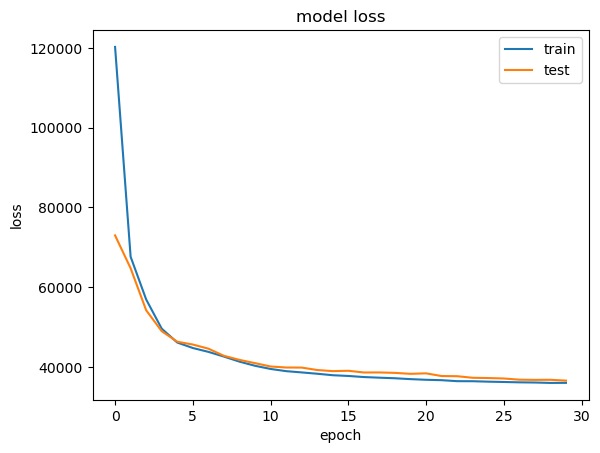

In [114]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [115]:
# normal

predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


,reconstruction_error,true_class
count,240.000000,240.000000
mean,35822.094964,0.491667
std,8327.784869,0.500975
min,22342.567848,0.000000
25%,30487.361640,0.000000
50%,34348.067641,0.000000
75%,38733.687565,1.000000
max,77392.778773,1.000000


In [116]:
# abnormal

X_ab=df_abnm.drop('activity',axis=1)
y_ab=df_abnm['activity']
predictions = autoencoder.predict(X_ab)
mse = np.mean(np.power(X_ab - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_ab})
error_df.describe()

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step


,reconstruction_error,true_class
count,480.000000,480.0
mean,13787.611050,0.0
std,1855.610664,0.0
min,9267.997464,0.0
25%,12464.765053,0.0
50%,13797.107528,0.0
75%,14941.728120,0.0
max,19475.056809,0.0


In [119]:
# Denosing
df_denoise = df_nm.copy()

df_noise = df_nm.copy()
noise_factor = 0.5
for i in df.columns:
    if not i=="activity":
        noise = noise_factor * np.random.normal(loc=0.0, scale=1.0, size=len(df_nm))
        df_noise[i] = df_nm[i] + noise
print(df_denoise)
print(df_noise)



# Noisy Data
X_train, X_test = train_test_split(df_noise, test_size=0.1, random_state=42)
X_train=X_train.drop('activity',axis=1)
y_test = X_test['activity'].copy()
X_test=X_test.drop('activity',axis=1)

      T_xacc_mean  T_xacc_max  T_xacc_min  T_xacc_var  T_xacc_std  \
960             2           5          14         602         602   
961            14          50          20         853         853   
962             5          11          22         687         687   
963            34          52          16         868         868   
964            19          24          34         577         577   
...           ...         ...         ...         ...         ...   
1915          885         788         817          15          15   
1916          858         782         808          18          18   
1917          863         784         786          58          58   
1918          883         786         805          22          22   
1919          867         803         795         113         113   

      T_xacc_skew  T_yacc_mean  T_yacc_max  T_yacc_min  T_yacc_var  ...  \
960           896          675         641         650         497  ...   
961           946    

In [120]:
# 오토인코더 모델

encoding_dim = 60  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)

input_layer = Input(shape=(X_train.shape[1],))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
encoded = Dense(int(encoding_dim / 5), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 4), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 3), activation='relu')(encoded)
decoded = Dense(X_train.shape[1])(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# 모델 요약 출력
autoencoder.summary()

Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_21 (InputLayer)     │ (None, 271)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_90 (Dense)                │ (None, 60)             │        16,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_91 (Dense)                │ (None, 30)             │         1,830 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_92 (Dense)                │ (None, 12)             │           372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_94 (Dense)                │ (None, 20)             │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_95 (Dense)                │ (None, 271)            │         5,691 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,473 (95.60 KB)

 Trainable params: 24,473 (95.60 KB)

 Non-trainable params: 0 (0.00 B)

In [121]:
# 모델 학습
history2 = autoencoder.fit(X_train, X_train, 
                          epochs=30, 
                          batch_size=4, 
                          shuffle=True, 
                          validation_split = 0.1)

Epoch 1/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 174664.5156 - val_loss: 68003.4531
Epoch 2/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - loss: 65353.3398 - val_loss: 56420.2461
Epoch 3/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - loss: 54699.5430 - val_loss: 48706.2930
Epoch 4/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - loss: 47520.9258 - val_loss: 44640.9883
Epoch 5/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - loss: 43583.5820 - val_loss: 44160.5273
Epoch 6/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - loss: 43050.5742 - val_loss: 42604.2305
Epoch 7/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - loss: 41121.5938 - val_loss: 41002.1367
Epoch 8/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - loss: 39843.1289 - val_loss: 39594.7383
Epoch 9/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 38707.7461 - val_loss: 38759.7148
Epoch 10/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - loss: 36802.5273 - val_loss: 38734.5117
Epoch 11/30
195/195 ━━━━━━━━━━━━━━━━━━━━

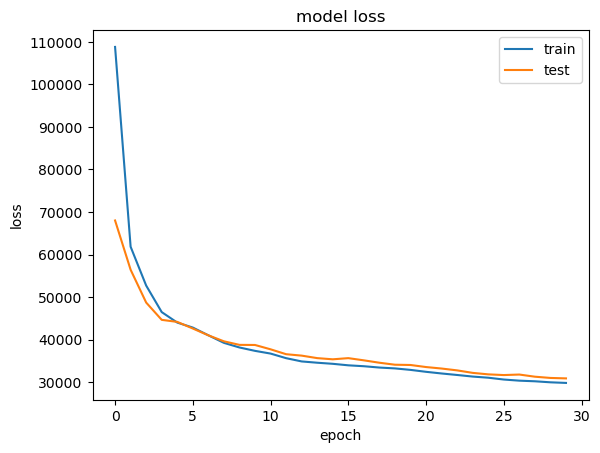

In [122]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [136]:
# normal

predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


,reconstruction_error,true_class
count,96.000000,96.000000
mean,30614.678735,0.541667
std,11854.448780,0.500876
min,13763.964844,0.000000
25%,23012.997458,0.000000
50%,27905.596559,1.000000
75%,34171.134645,1.000000
max,71423.037916,1.000000


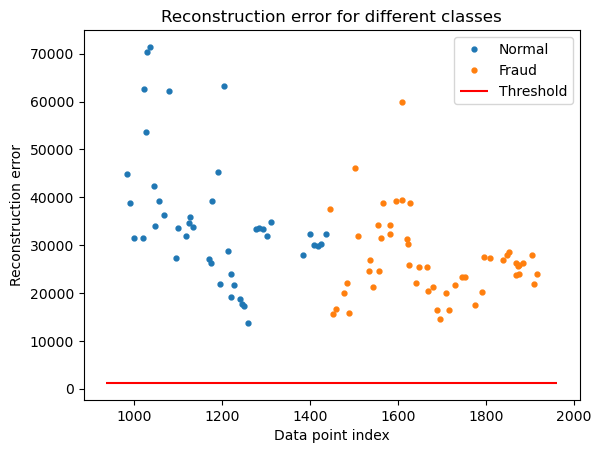

In [137]:
# threshold 값을 조정하여 최선의 정확도를 얻음, 그래프로를 보고 결정
threshold = 1200

groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

In [138]:
# abnormal

X_ab=df_abnm.drop('activity',axis=1)
y_ab=df_abnm['activity']
predictions = autoencoder.predict(X_ab)
mse = np.mean(np.power(X_ab - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_ab})
error_df.describe()

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step


,reconstruction_error,true_class
count,480.000000,480.0
mean,17455.026171,0.0
std,2692.284550,0.0
min,10108.340092,0.0
25%,15545.268871,0.0
50%,17598.083087,0.0
75%,19372.389647,0.0
max,24184.690379,0.0


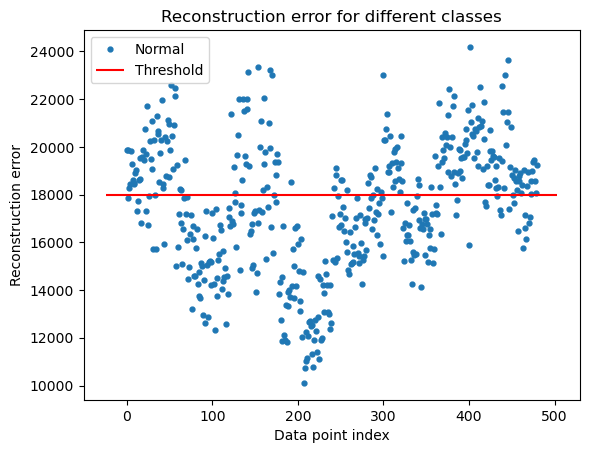

In [139]:
# threshold 값을 조정하여 최선의 정확도를 얻음, 그래프로를 보고 결정
threshold = 18000

groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();